<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Datasets y Dataloaders:CIFAR10</center></span>

<figure>
<center>
<img src="../Imagenes/Data_ST.jpg" width="400" height="400" align="center"/>
</center>
</figure>


Fuente: <a href="https://commons.wikimedia.org/wiki/File:Data_ST.jpg">Glenn_Cote_Brent_Spiner.jpg: Grcotederivative work: El Carlos</a>, <a href="http://www.gnu.org/copyleft/fdl.html">GFDL</a>, via Wikimedia Commons<a 

## <span style="color:#4361EE">Coordinador</span>

- Campo Elías Pardo, PhD, cepardot@unal.edu.co

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com
1. Jessica López Mejía, jelopezme@unal.edu.co
1. Venus Celeste Puertas Gualtero, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

6. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

7. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

8. Dairo Moreno, damoralesj@unal.edu.co
9. Joan Castro, jocastroc@unal.edu.co
10. Bryan Riveros, briveros@unal.edu.co
11. Rosmer Vargas, rovargasc@unal.edu.co
12. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:blue">Referencias</span>

1. [Alvaro Montenegro y Daniel Montenegro, Inteligencia Artificial y Aprendizaje Profundo, 2023](https://github.com/AprendizajeProfundo/Diplomado)
1. [Alvaro Montenegro, Daniel Montenegro y Oleg Jarma,  Inteligencia Artificial y Aprendizaje Profundo Avanzado, 2023](https://github.com/AprendizajeProfundo/Diplomado-Avanzado)
1. [Tutoriales de Pytorch](https://pytorch.org/tutorials/)
1. [Pytorchlightning.ai](https://www.pytorchlightning.ai/)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Carga de un Dataset](#Carga-de-un-Dataset)
* [Creación de un conjunto de datos personalizado para sus archivo](#Creación-de-un-conjunto-de-datos-personalizado-para-sus-archivos)
* [Preparando sus datos para entrenamiento con DataLoaders](#Preparando-sus-datos-para-entrenamiento-con-DataLoaders)

## <span style="color:blue">Introducción</span>

El código para procesar muestras de datos puede resultar complicado y difícil de mantener; idealmente queremos que nuestro código de datasets se desacople de nuestro código de entrenamiento modelo para una mejor legibilidad y modularidad. PyTorch proporciona dos primitivas de datos: `torch.utils.data.DataLoader` y `torch.utils.data.Dataset` que le permiten utilizar conjuntos de datos precargados, así como sus propios datos. 

`Dataset` almacena las muestras y sus etiquetas correspondientes, y `DataLoader` envuelve un iterable alrededor del conjunto de datos para permitir un fácil acceso a las muestras.

Las librerías especializadas de Pytorch como Torchvision, Torchtext, Torchaudio tienen conjuntos de datos disponibles para ser cargados directamente como Datasets. Revisemos el ejemplo de  FashionMNIST.

## <span style="color:blue">Ejemplo CIFAR10</span>

### <span style="color:#4CC9F0"><span style="color:#4CC9F0">Carga de un Dataset</span>

In [3]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
# carga el dataset CIFAR10
import torchvision.datasets as datasets
CIFAR10 = datasets.CIFAR10

In [62]:
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


### <span style="color:#4CC9F0">Iterando y visualizando el dataset</span>

In [ ]:
label_map = {
    0: 'Avión',
    1: "Automóvil",
    2: "Pájaro",
    3: "Gato",
    4: "Venado",
    5: "Perro",
    6: "Rana",
    7: "Caballo",
    8: "Barco",
    9: "Camión",
}

figure = plt.figure(figsize=(5,5))
cols, rows = 6,5
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size =(1,)).item()
    img, label = training_data[sample_idx]
    img = img.numpy()
    img = img.transpose(1,2,0)
    figure.add_subplot(rows, cols, i)
    plt.title(label_map[label], fontsize=4)    
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

### <span style="color:#4CC9F0">Creación de un conjunto de datos personalizado para sus archivos</span>

En este ejemplo, las imágenes FashionMNIST se almacenan en un directorio img_dir, y sus etiquetas se almacenan por separado en un archivo CSV  `annotations_file`.


Los datos fueron bajados desde la fuente usando el siguinete código
En este ejemplo hemos dejado los datos en la rura relativa

+ "../Datos/Cifar10/cifar-10-batches-py../Datos/Cifar10/cifar-10-batches-py"

In [ ]:
import urllib.request
import tarfile
import os

# URL de descarga de CIFAR-10
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

# Ruta de la carpeta de destino para guardar los datos
data_folder = "../Datos/Cifar10"

# Verificar si la carpeta de destino existe, de lo contrario, crearla
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Nombre del archivo de destino
filename = os.path.join(data_folder, "cifar-10-python.tar.gz")

# Descargar el archivo de CIFAR-10
urllib.request.urlretrieve(url, filename)

# Descomprimir el archivo tar.gz
tar = tarfile.open(filename, "r:gz")
tar.extractall(data_folder)
tar.close()

print("Los datos de CIFAR-10 se han descargado y descomprimido correctamente.")


#### <span style="color:#4CC9F0">Lectura de lotes de datos binarios</span>

Si revisa la carpeta en donde bajó los datos encuentra 5 archivos. Cada de ellos es una rchivo binario que contiene 10.000 cons sus respectivas etiquetas. De acuerdo con la documentación los datos tienen las siguientes características:

+ Cada batch retorna un conjunto de 10,000 imágenes de 10 clases distintas. 
+ Los datos que se lee de los archivos batch son los valores de los labels y data.
+ Los labels son los valores pertenecientes a la clase de la imagen.
+ La data son los valores de píxeles de la imagen, originalmente es un vector de (3072,), pero este vector tiene la información asociada tanto de cada canal de color de la imagen, ya sea rojo, verde y azul. Es por ello que el vector se divide por 3 tal que el vector de (3072,) pasa a ser una matriz de (3,1024)
+ Ese vector de (1024,) debemos transformarla en matriz de (32,32) que seria las dimensiones de la imagen,
+ Dejando finalmente un matriz multidimensional de (3,32,32) 

In [112]:
import pickle

def load_batch(name_file, is_torch= True,
               default_batch_path="../Datos/Cifar10/cifar-10-batches-py/"):
    """
    Parámetros:
    name_file -- Nombre del archivo a leer
    
    Return:
    labels -- vector columna con los valores de la clase correspondiente a cada imagen.
    data -- datos asociados a los pixeles de las imágenes.
    """
   
    with open(default_batch_path + name_file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    #
    labels = dict[b'labels']
    # 
    data = dict[b'data']
    #  
    data = data.reshape((len(dict[b'data']), 3, 32, 32))
    # Formato HEIGHT, WIDTH Y CHANNEL para Tensorflow
    if not is_torch:
        data = data.transpose(0, 2, 3, 1) ## (1000,32,32,3)
    return labels, data

# Carguemos el batch 1
label_b1,data_b1 = load_batch("data_batch_1")
print(data_b1.shape)

(10000, 3, 32, 32)


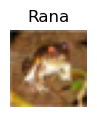

In [114]:
# Mostramos la primera imagen
# transponemos para matplotlib
data_b1 = data_b1.transpose(0, 2, 3, 1) ## (1000,32,32,3)
plt.figure(figsize=(1,1))
plt.imshow(data_b1[0])
plt.title(label_map[label_b1[0]])
plt.axis('off')
plt.show()

#### <span style="color:#4CC9F0">Reporte general de todos los datos</span> 

Esta función se encarga de imprimir un reporte de las imágenes del data batch indicando cuantas imágenes de cada clase existe dentro del batch

In [115]:
def Show_Info_Batch(id, label_map=label_map):
    """
    Parámetros
    id -- Número del batch que se desea cargar(1 - 5)
    """
    print("-------------Batch " + str(id) + " -------------")
    if (id > 5 or id < 1):
        print("id out of range")
        return None
    labels, data = load_batch('data_batch_' + str(id))
    
    print("Total imágenes: " + str(len(labels)))
    total_label = [0,0,0,0,0,0,0,0,0,0]
    for i in range(len(labels)):
        total_label[labels[i]] = total_label[labels[i]] + 1
    
    for i in range(len(label_map)):
        print(label_map[i] + ": " + str(total_label[i]))
        
for i in range(1,6):
    Show_Info_Batch(i)

-------------Batch 1 -------------
Total imágenes: 10000
Avión: 1005
Automóvil: 974
Pájaro: 1032
Gato: 1016
Venado: 999
Perro: 937
Rana: 1030
Caballo: 1001
Barco: 1025
Camión: 981
-------------Batch 2 -------------
Total imágenes: 10000
Avión: 984
Automóvil: 1007
Pájaro: 1010
Gato: 995
Venado: 1010
Perro: 988
Rana: 1008
Caballo: 1026
Barco: 987
Camión: 985
-------------Batch 3 -------------
Total imágenes: 10000
Avión: 994
Automóvil: 1042
Pájaro: 965
Gato: 997
Venado: 990
Perro: 1029
Rana: 978
Caballo: 1015
Barco: 961
Camión: 1029
-------------Batch 4 -------------
Total imágenes: 10000
Avión: 1003
Automóvil: 963
Pájaro: 1041
Gato: 976
Venado: 1004
Perro: 1021
Rana: 1004
Caballo: 981
Barco: 1024
Camión: 983
-------------Batch 5 -------------
Total imágenes: 10000
Avión: 1014
Automóvil: 1014
Pájaro: 952
Gato: 1016
Venado: 997
Perro: 1025
Rana: 980
Caballo: 977
Barco: 1003
Camión: 1022


### <span style="color:#4CC9F0">Creación de un dataset Cifar10</span> 

In [4]:
import pickle
import glob
import numpy as np

class Cifar10Dataset(Dataset):
    def __init__(self, transform=None, target_transform=None, 
                 directorio="../Datos/Cifar10/cifar-10-batches-py",
                 train=True
                ):
        
        self.directorio = directorio
        self.labels = []
        self.images = []
        self.transform = transform
        self.target_transform = target_transform
        self.train = train
        self.load_data()
    
    def load_data(self):
        if self.train:
            prefijo = 'data_batch_'  
            files = glob.glob(f'{self.directorio}/{prefijo}*')
        else:
            prefijo = 'test_batch' 
            files = glob.glob(f'{self.directorio}/{prefijo}*')
            
        for file in files:
            with open(file, 'rb') as fo:
                dict = pickle.load(fo, encoding='bytes')
                labels = dict[b'labels']
                data = dict[b'data']
                data = np.array(data.reshape((len(dict[b'data']), 3, 32, 32)))
                data_list = [data[i].squeeze() for i in range(data.shape[0])]
                self.labels.extend(labels)
                self.images.extend(data_list)
                             
    def __len__(self):
        return len(self.labels)        

       
    def __getitem__(self, idx):
        image = self.images[idx]
        label =  self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label



In [5]:
cifar_train_data = Cifar10Dataset(train=True)
len(cifar_train_data)

50000

In [6]:
cifar_test_data = Cifar10Dataset(train=False)
len(cifar_test_data)

10000

### <span style="color:#4CC9F0">Preparando sus datos para entrenamiento con DataLoaders</span>

In [7]:
from torch.utils.data import DataLoader

num_workers = torch.get_num_threads()//2

train_dataloader = DataLoader(cifar_train_data, batch_size=64, shuffle=True, 
                               num_workers= num_workers)

test_dataloader = DataLoader(cifar_test_data, batch_size=64, shuffle=False)

torch.get_num_threads()

2

In [8]:
len(next(iter(test_dataloader)))

2

### <span style="color:#4CC9F0">Iterando a lo largo del DataLoader</span>

Cada iteración retorna un batch (`batch_size=64`) de datos (`train_features` y `train_labels`). Dado que *shuffel=True* en el ejemplo, todos los lotes de datos se mezclan. Un control más fino para establecer el orden se obtiene usando `Samplers`.

Shape del lote de imágenes: torch.Size([64, 3, 32, 32])
Shape del lote de etiquetas: torch.Size([64])


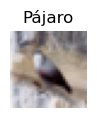

In [15]:
# Despliega imagen y etiqueta
train_features, train_labels = next(iter(train_dataloader))
print(f'Shape del lote de imágenes: {train_features.size()}')
print(f'Shape del lote de etiquetas: {train_labels.size()}')
train_features = train_features.numpy().transpose(0, 2, 3, 1) 
plt.figure(figsize=(1,1))
plt.imshow(train_features[0])
plt.title(label_map[train_labels.numpy()[0]])
plt.axis('off')
plt.show()

#### <span style="color:#4CC9F0">Un iterador de visualización</span> 

In [36]:
label_map = {
    0: 'Avión',
    1: "Automóvil",
    2: "Pájaro",
    3: "Gato",
    4: "Venado",
    5: "Perro",
    6: "Rana",
    7: "Caballo",
    8: "Barco",
    9: "Camión",
}


class Draw:
    def __init__(self, label_map, images_iterator, cols=4, rows=4, figsize=(6,6)):
        self.data = images_iterator
        self.label_map = label_map
        self.figsize=figsize
        self.cols = cols
        self.rows = rows
        self.index = 0      

    def __iter__(self):
        return self

    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration

        self.index += 1  
        
        img, label = next(self.data)
        figure = plt.figure(figsize=self.figsize)
        for i in range(1, self.cols*self.rows+1):
            #sample_idx = torch.randint(len(training_data), size =(1,)).item()
            #img, label = training_data[sample_idx]
            figure.add_subplot(self.rows, self.cols, i)
            #plt.title(self.label_map[label])
            plt.axis('off')
            plt.imshow(img[i].numpy().transpose( 1, 2, 0) )
            plt.title(label_map[label[i].item()])
        plt.show()
        #return value

In [37]:
images = Draw(label_map, iter(train_dataloader))

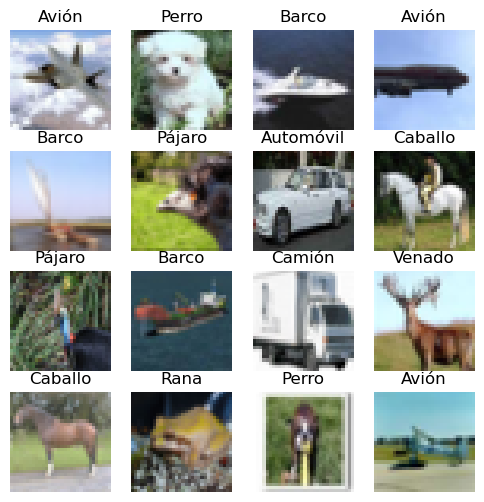

In [39]:
next(images)